# CS - 3. Common Algorithms - 3.6 Greedy Algorithms - 3.6.4 Prim's algorithm

 

Prim’s Algorithm
💡 Prim’s algorithm is a greedy algorithm that finds a minimum spanning tree for a weighted undirected graph. A minimum spanning tree is a subset of the edges of a connected, edge-weighted undirected graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight. A minimum spanning tree for a weighted undirected graph is also called a minimum weight spanning tree or minimum cost spanning tree.

프림의 알고리즘은 가중치가 있는 방향성 없는 그래프의 최소 스패닝 트리를 찾는 탐욕스러운 알고리즘입니다. 최소 스패닝 트리는 모든 정점을 순환 없이 가능한 최소한의 총 에지 가중치로 연결하는 연결된 에지 가중 무방향 그래프의 에지 하위 집합입니다. 가중치가 적용된 방향성 없는 그래프의 최소 스패닝 트리는 최소 가중치 스패닝 트리 또는 최소 비용 스패닝 트리라고도 합니다.

Prim's Algorithm은 그래프 이론에서 최소 신장 트리를 찾는 알고리즘 중 하나입니다. 최소 신장 트리는 그래프의 모든 정점을 연결하는 간선들의 가중치 합이 최소가 되는 트리를 의미합니다. 이 알고리즘은 시작 정점에서부터 가장 가까운 정점을 선택하여 신장 트리를 확장해 나가는 방식으로 작동합니다.

Prim's Algorithm의 작동 과정은 이렇습니다.
1. 시작할 정점을 선택합니다.
2. 선택한 정점과 연결된 간선들 중에서 가장 가중치가 작은 간선을 선택합니다.
3.선택한 간선에 연결된 정점을 최소 신장 트리의 일부로 추가합니다.
4. 모든 정점이 최소 신장 트리에 포함될 때까지 2-3단계를 반복합니다.

## In Python

In [1]:
import heapq

def prim(graph, start_node):
    mst = list()
    visited = [False] * len(graph)
    queue = [(0, start_node)]
    
    while queue:
        weight, node = heapq.heappop(queue)
        if not visited[node]:
            visited[node] = True
            mst.append((weight, node))
            for edge in graph[node]:
                heapq.heappush(queue, edge)
    return mst




[(0, 0), (2, 1), (1, 3), (1, 2), (5, 4)]


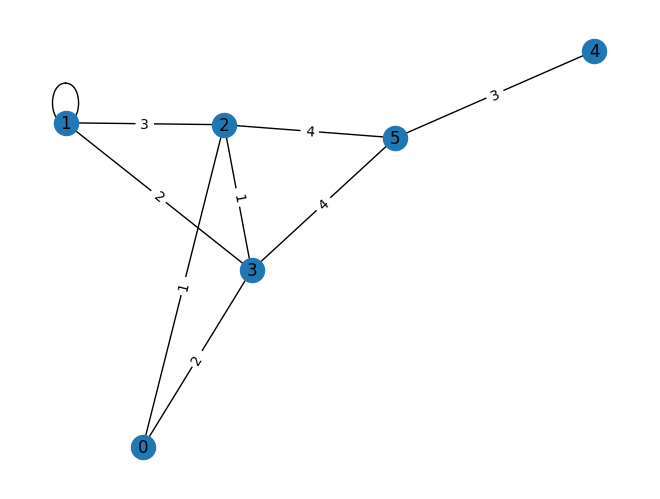

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

graph = [
    [(2, 1), (3, 2)],
    [(2, 0), (3, 2), (1, 3)],
    [(3, 0), (3, 1), (1, 3), (5, 4)],
    [(1, 1), (1, 2), (5, 4)],
    [(5, 2), (5, 3)]
]

G = nx.Graph()
for i, edges in enumerate(graph):
    for edge in edges:
        G.add_edge(i, edge[0], weight=edge[1])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [7]:
# 그래프 예시
graph = [[(2, 1), (3, 2)],
         [(2, 0), (3, 2), (1, 3)],
         [(3, 0), (3, 1), (1, 3), (5, 4)],
         [(1, 1), (1, 2), (5, 4)],
         [(5, 2), (5, 3)]]

print(prim(graph, 0))

[(0, 0), (2, 1), (1, 3), (1, 2), (5, 4)]


Prim 알고리즘은 시작 노드에서부터 가장 가까운 노드를 선택하여 최소 신장 트리를 확장해 나가는 방식으로 작동합니다. 시작 노드 0에서 어떤식으로 프림 알고리즘이 진행되는지 설명하겠습니다.


1. 시작 노드는 0이며, 아직 어떤 노드도 최소 신장 트리에 포함되지 않았습니다. 따라서 시작 노드 0을 최소 신장 트리에 추가합니다. 이때의 상태를 (0, 0)으로 표현하였습니다.


2. 노드 0과 연결된 노드들 중 가장 가중치가 작은 노드를 선택합니다. 노드 0과 연결된 노드는 1, 2이며, 이 중 가중치가 작은 노드 1을 선택하여 최소 신장 트리에 추가합니다. 이때의 상태를 (2, 1)로 표현하였습니다.


3. 이제 노드 0과 1이 최소 신장 트리에 포함되었습니다. 이 두 노드와 연결된 노드들 중 가장 가중치가 작은 노드를 선택합니다. 노드 1과 연결된 노드 3을 선택하여 최소 신장 트리에 추가합니다. 이때의 상태를 (1, 3)로 표현하였습니다.


4. 노드 0, 1, 3이 최소 신장 트리에 포함되었습니다. 이 세 노드와 연결된 노드들 중 가장 가중치가 작은 노드를 선택합니다. 노드 3과 연결된 노드 2을 선택하여 최소 신장 트리에 추가합니다. 이때의 상태를 (1, 2)로 표현하였습니다.


5. 마지막으로, 노드 0, 1, 2, 3이 최소 신장 트리에 포함되었습니다. 이 네 노드와 연결된 노드들 중 가장 가중치가 작은 노드를 선택합니다. 노드 2와 연결된 노드 4을 선택하여 최소 신장 트리에 추가합니다. 이때의 상태를 (5, 4)로 표현하였습니다.


최종적으로 모든 노드가 최소 신장 트리에 포함되었으므로, 알고리즘은 종료됩니다. 이렇게 Prim 알고리즘은 각 단계에서 가장 가중치가 작은 노드를 선택하여 최소 신장 트리를 구성하게 됩니다.

## 활용

Prim's Algorithm은 그래프에서 최소 신장 트리를 찾는 데 유용하게 사용될 수 있습니다. 그러나 주어진 그래프의 구조나 간선의 가중치 분포에 따라 다른 알고리즘이 더 효율적일 수 있으므로, 상황에 따라 적절히 알고리즘을 선택하는 것이 중요합니다.


여러 위치를 가장 효율적으로 연결해야하는 문제를 해결할때 자주 사용됩니다.
"최소 신장 트리"라는 개념으로 추상화 할수 있기 때문입니다.

 
1. 통신 네트워크
2. 전력 그리드

등등..